<a href="https://colab.research.google.com/github/Anikcse19/Books-site-with-responsive/blob/main/Thesis_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr

imported batting data

In [4]:
batting_data=pd.read_csv('/content/drive/MyDrive/Thesis Data set/Batting list/Batting dataset (1).xlsx - Sheet1.csv',encoding= 'unicode_escape')
batting_data

,Name,Description,Runs,Balls,Minutes,Fours,Sixes,Strike_Rate,Batting_position,Match_id
0,Tamim Iqbal,c â Dhoni b Yadav,25,25,28.0,4,0,100,1,656485
1,Imrul Kayes,run out (Jadeja/Yadav),5,14,31.0,0,0,35.71,2,656485
2,Soumya Sarkar,c Dhoni b Mohammed Shami,29,43,59.0,3,1,67.44,3,656485
3,Mahmudullah,c Dhawan b Mohammed Shami,21,31,44.0,2,0,67.74,4,656485
4,Shakib Al Hasan,c Mohammed Shami b Jadeja,10,34,36.0,0,0,29.41,5,656485
...,...,...,...,...,...,...,...,...,...,...
920,Taskin Ahmed,c Adair b Hume,11,7,9.0,0,1,157.14,8,1355717
921,Nasum Ahmed,not out,11,7,11.0,2,0,157.14,9,1355717
922,Mustafizur Rahman,not out,1,2,2.0,0,0,50,10,1355717
923,Tamim Iqbal (c),not out,41,41,59.0,5,2,100,1,1355719


In [5]:
batting_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              925 non-null    object 
 1   Description       925 non-null    object 
 2   Runs              925 non-null    int64  
 3   Balls             925 non-null    int64  
 4   Minutes           924 non-null    float64
 5   Fours             925 non-null    int64  
 6   Sixes             925 non-null    int64  
 7   Strike_Rate       925 non-null    object 
 8   Batting_position  925 non-null    int64  
 9   Match_id          925 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 72.4+ KB


In [6]:
batting_data.describe()

,Runs,Balls,Minutes,Fours,Sixes,Batting_position,Match_id
count,925.000000,925.000000,924.000000,925.000000,925.000000,925.000000,9.250000e+02
mean,25.564324,30.796757,45.007576,2.433514,0.401081,5.225946,1.140642e+06
std,29.373793,30.661004,45.470609,3.104103,0.892610,2.977509,1.412483e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.564850e+05
25%,4.000000,7.000000,11.000000,0.000000,0.000000,3.000000,1.051299e+06
50%,15.000000,21.000000,29.000000,1.000000,0.000000,5.000000,1.153249e+06
75%,37.000000,44.000000,66.250000,4.000000,0.000000,8.000000,1.244024e+06
max,176.000000,160.000000,245.000000,20.000000,8.000000,11.000000,1.355719e+06


Find coorelation of batting dataset

In [7]:
batting_data.corr()

<ipython-input-7-50d0d9db6986>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  batting_data.corr()


,Runs,Balls,Minutes,Fours,Sixes,Batting_position,Match_id
Runs,1.000000,0.948101,0.938447,0.901923,0.605681,-0.365804,-0.016694
Balls,0.948101,1.000000,0.977696,0.832342,0.479486,-0.406134,0.000433
Minutes,0.938447,0.977696,1.000000,0.830502,0.481135,-0.393650,0.019993
Fours,0.901923,0.832342,0.830502,1.000000,0.430114,-0.384845,-0.061934
Sixes,0.605681,0.479486,0.481135,0.430114,1.000000,-0.148966,0.010429
Batting_position,-0.365804,-0.406134,-0.393650,-0.384845,-0.148966,1.000000,0.001761
Match_id,-0.016694,0.000433,0.019993,-0.061934,0.010429,0.001761,1.000000


<ipython-input-8-9404a687bb26>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=batting_data.corr()


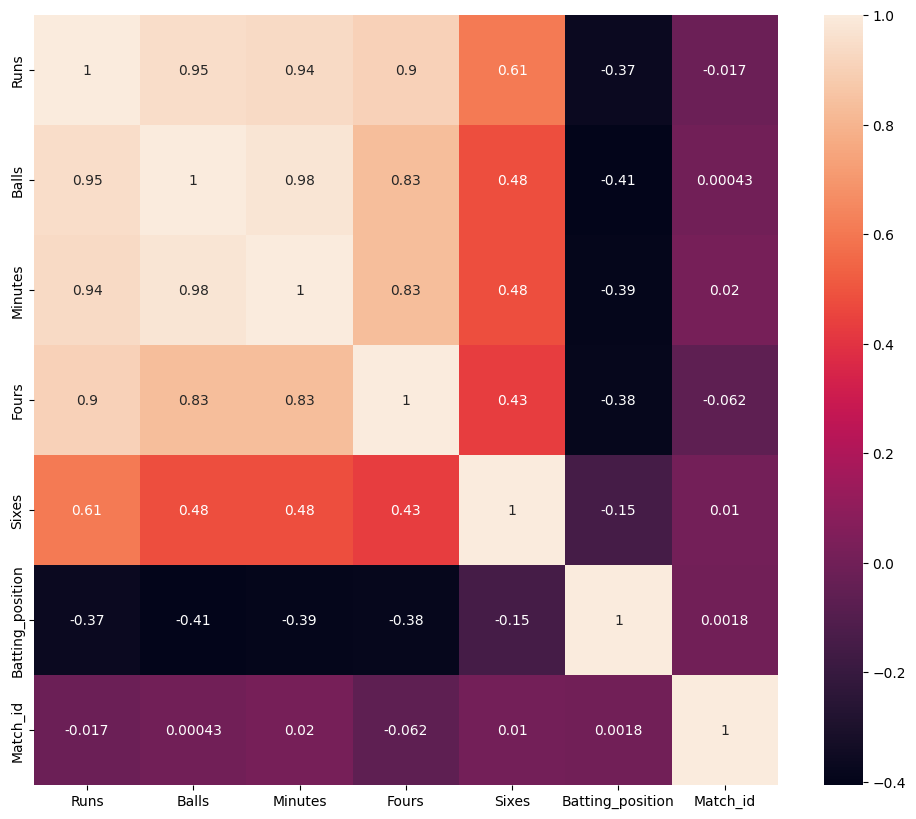

In [8]:
plt.figure(figsize=(12,10))
corr=batting_data.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [9]:
batting_data_updated=batting_data.drop('Minutes', axis=1)

In [10]:
batting_data_updated

,Name,Description,Runs,Balls,Fours,Sixes,Strike_Rate,Batting_position,Match_id
0,Tamim Iqbal,c â Dhoni b Yadav,25,25,4,0,100,1,656485
1,Imrul Kayes,run out (Jadeja/Yadav),5,14,0,0,35.71,2,656485
2,Soumya Sarkar,c Dhoni b Mohammed Shami,29,43,3,1,67.44,3,656485
3,Mahmudullah,c Dhawan b Mohammed Shami,21,31,2,0,67.74,4,656485
4,Shakib Al Hasan,c Mohammed Shami b Jadeja,10,34,0,0,29.41,5,656485
...,...,...,...,...,...,...,...,...,...
920,Taskin Ahmed,c Adair b Hume,11,7,0,1,157.14,8,1355717
921,Nasum Ahmed,not out,11,7,2,0,157.14,9,1355717
922,Mustafizur Rahman,not out,1,2,0,0,50,10,1355717
923,Tamim Iqbal (c),not out,41,41,5,2,100,1,1355719


Imported Batting weather dataset


In [11]:
batting_weather_dataset=pd.read_csv('/content/drive/MyDrive/Thesis Data set/Weather Dataset/Weather Dataset - Sheet1.csv')
batting_weather_dataset

,Date,Match_id,URL_Text,Batting_Session,Venue,Temp,Feels,Wind,Gust,Rain,Cloud,Pressure
0,19-Mar-15,656485,ODI # 3641,18.45-22.15,Melbourne Cricket Ground,21,25,14,33,0.2,73,1017
1,17-Apr-15,858485,ODI # 3647,14.30-18.00,Shere Bangla National Stadium,34,37,13,23,0.0,46,1005
2,19-Apr-15,858487,ODI # 3648,18.45-22.15,Shere Bangla National Stadium,29,34,13,19,0.0,15,1008
3,22-Apr-15,858489,ODI # 3649,18.45-22.15,Shere Bangla National Stadium,27,31,13,31,2.6,62,1004
4,18-Jun-15,870731,ODI # 3658,15.00-18.30,Shere Bangla National Stadium,32,40,9,12,0.0,21,998
...,...,...,...,...,...,...,...,...,...,...,...,...
101,01-Mar-23,1351397,ODI # 4525,12.00-15.30,Shere Bangla National Stadium,36,35,15,17,0.0,0,1012
102,03-Mar-23,1351398,ODI # 4528,16.15-19.45,Shere Bangla National Stadium,32,30,10,20,0.0,0,1012
103,06-Mar-23,1351399,ODI # 4531,12.00-15.30,Zahur Ahmed Chowdhury Stadium,31,36,14,16,0.0,0,1011
104,18-Mar-23,1355717,ODI # 4539,10.45-14.15,Sylhet International Cricket Stadium,26,27,15,18,0.0,27,1013


In [12]:
batting_weather_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             106 non-null    object 
 1   Match_id         106 non-null    int64  
 2   URL_Text         106 non-null    object 
 3   Batting_Session  106 non-null    object 
 4   Venue            106 non-null    object 
 5   Temp             106 non-null    int64  
 6   Feels            106 non-null    int64  
 7   Wind             106 non-null    int64  
 8   Gust             106 non-null    int64  
 9   Rain             106 non-null    float64
 10  Cloud            106 non-null    int64  
 11  Pressure         106 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 10.1+ KB


Find coorelation of weather dataset

In [13]:
batting_weather_dataset.corr()

<ipython-input-13-942ad9f17af2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  batting_weather_dataset.corr()


,Match_id,Temp,Feels,Wind,Gust,Rain,Cloud,Pressure
Match_id,1.000000,0.007626,-0.096931,-0.076872,-0.080622,-0.067600,-0.297146,0.315271
Temp,0.007626,1.000000,0.965183,-0.196079,-0.176123,0.139479,-0.169413,-0.618152
Feels,-0.096931,0.965183,1.000000,-0.209046,-0.159496,0.212258,-0.046994,-0.692988
Wind,-0.076872,-0.196079,-0.209046,1.000000,0.836524,-0.111553,-0.016075,0.088890
Gust,-0.080622,-0.176123,-0.159496,0.836524,1.000000,0.031214,0.094319,0.085726
Rain,-0.067600,0.139479,0.212258,-0.111553,0.031214,1.000000,0.430923,-0.218462
Cloud,-0.297146,-0.169413,-0.046994,-0.016075,0.094319,0.430923,1.000000,-0.186877
Pressure,0.315271,-0.618152,-0.692988,0.088890,0.085726,-0.218462,-0.186877,1.000000


<ipython-input-14-3c81456fcd96>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=batting_weather_dataset.corr()


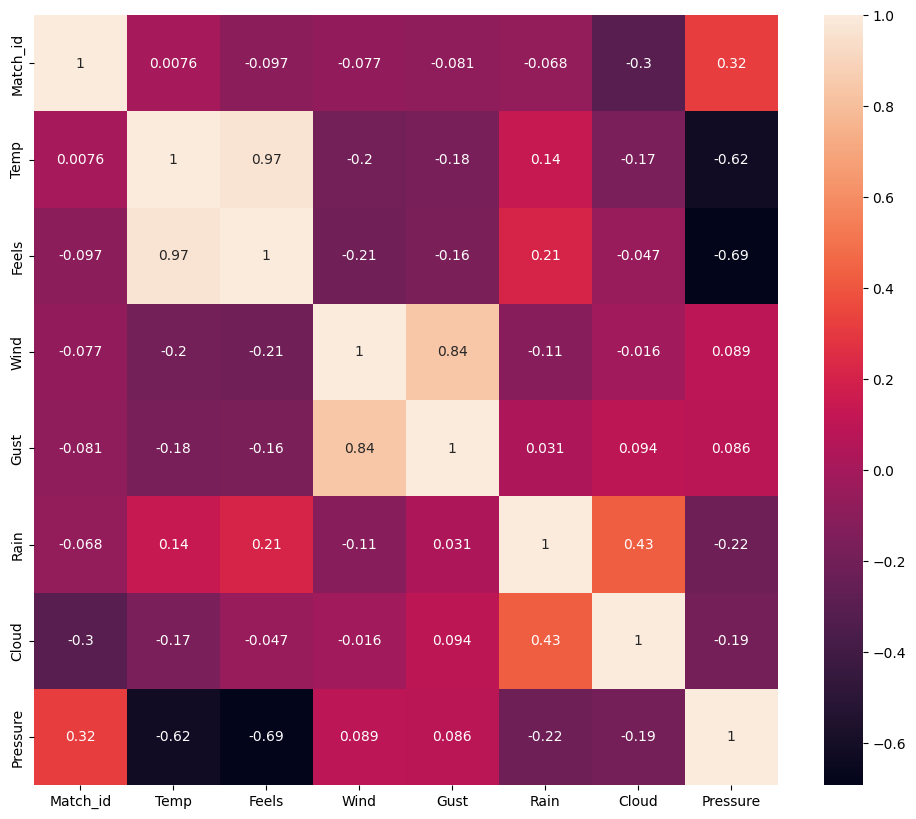

In [14]:
plt.figure(figsize=(12,10))
corr=batting_weather_dataset.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [15]:
batting_weather_dataset_updated=batting_weather_dataset.drop('Feels',axis=1)
batting_weather_dataset_updated=batting_weather_dataset_updated.drop('Gust',axis=1)
batting_weather_dataset_updated

,Date,Match_id,URL_Text,Batting_Session,Venue,Temp,Wind,Rain,Cloud,Pressure
0,19-Mar-15,656485,ODI # 3641,18.45-22.15,Melbourne Cricket Ground,21,14,0.2,73,1017
1,17-Apr-15,858485,ODI # 3647,14.30-18.00,Shere Bangla National Stadium,34,13,0.0,46,1005
2,19-Apr-15,858487,ODI # 3648,18.45-22.15,Shere Bangla National Stadium,29,13,0.0,15,1008
3,22-Apr-15,858489,ODI # 3649,18.45-22.15,Shere Bangla National Stadium,27,13,2.6,62,1004
4,18-Jun-15,870731,ODI # 3658,15.00-18.30,Shere Bangla National Stadium,32,9,0.0,21,998
...,...,...,...,...,...,...,...,...,...,...
101,01-Mar-23,1351397,ODI # 4525,12.00-15.30,Shere Bangla National Stadium,36,15,0.0,0,1012
102,03-Mar-23,1351398,ODI # 4528,16.15-19.45,Shere Bangla National Stadium,32,10,0.0,0,1012
103,06-Mar-23,1351399,ODI # 4531,12.00-15.30,Zahur Ahmed Chowdhury Stadium,31,14,0.0,0,1011
104,18-Mar-23,1355717,ODI # 4539,10.45-14.15,Sylhet International Cricket Stadium,26,15,0.0,27,1013


Bowling weather dataset

In [16]:
bowling_weather_dataset=pd.read_csv('/content/drive/MyDrive/Thesis Data set/Bowling Weather Dataset/Bowling weather dataset - Sheet1.csv')
bowling_weather_dataset

,Date,Match_id,URL_Text,Bowling_Session,Venue,Temp,Feels,Wind,Gust,Rain,Cloud,Pressure
0,19-Mar-15,656485,ODI # 3641,14.30-18.00,Melbourne Cricket Ground,24,23,13,30,0.2,72,1017
1,17-Apr-15,858485,ODI # 3647,18.45-22.15,Shere Bangla National Stadium,31,34,13,23,0.0,46,1004
2,19-Apr-15,858487,ODI # 3648,14.30-18.00,Shere Bangla National Stadium,27,31,12,18,0.0,23,1007
3,22-Apr-15,858489,ODI # 3649,14.30-18.00,Shere Bangla National Stadium,25,30,13,30,2.4,65,1005
4,18-Jun-15,870731,ODI # 3658,19.15-22.45,Shere Bangla National Stadium,31,37,10,14,0.0,22,999
...,...,...,...,...,...,...,...,...,...,...,...,...
101,01-Mar-23,1351397,ODI # 4525,16.15-19.45,Shere Bangla National Stadium,31,30,14,16,0.0,0,1011
102,03-Mar-23,1351398,ODI # 4528,12.00-15.30,Shere Bangla National Stadium,30,28,11,19,0.0,0,1012
103,06-Mar-23,1351399,ODI # 4531,16.15-19.45,Zahur Ahmed Chowdhury Stadium,28,31,13,15,0.0,0,1010
104,18-Mar-23,1355717,ODI # 4539,15.00-18.30,Sylhet International Cricket Stadium,27,28,14,17,0.0,29,1012


In [17]:
bowling_weather_dataset.corr()

<ipython-input-17-0089882f8526>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bowling_weather_dataset.corr()


,Match_id,Temp,Feels,Wind,Gust,Rain,Cloud,Pressure
Match_id,1.000000,-0.021298,-0.099652,-0.107283,-0.094028,-0.047668,-0.313878,0.313168
Temp,-0.021298,1.000000,0.957486,-0.250524,-0.195168,0.118162,-0.175958,-0.652507
Feels,-0.099652,0.957486,1.000000,-0.221028,-0.136893,0.209615,-0.065128,-0.715034
Wind,-0.107283,-0.250524,-0.221028,1.000000,0.845923,-0.111944,0.032240,0.098211
Gust,-0.094028,-0.195168,-0.136893,0.845923,1.000000,0.016977,0.089587,0.092927
Rain,-0.047668,0.118162,0.209615,-0.111944,0.016977,1.000000,0.435437,-0.212250
Cloud,-0.313878,-0.175958,-0.065128,0.032240,0.089587,0.435437,1.000000,-0.170515
Pressure,0.313168,-0.652507,-0.715034,0.098211,0.092927,-0.212250,-0.170515,1.000000


<ipython-input-18-3c81456fcd96>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=batting_weather_dataset.corr()


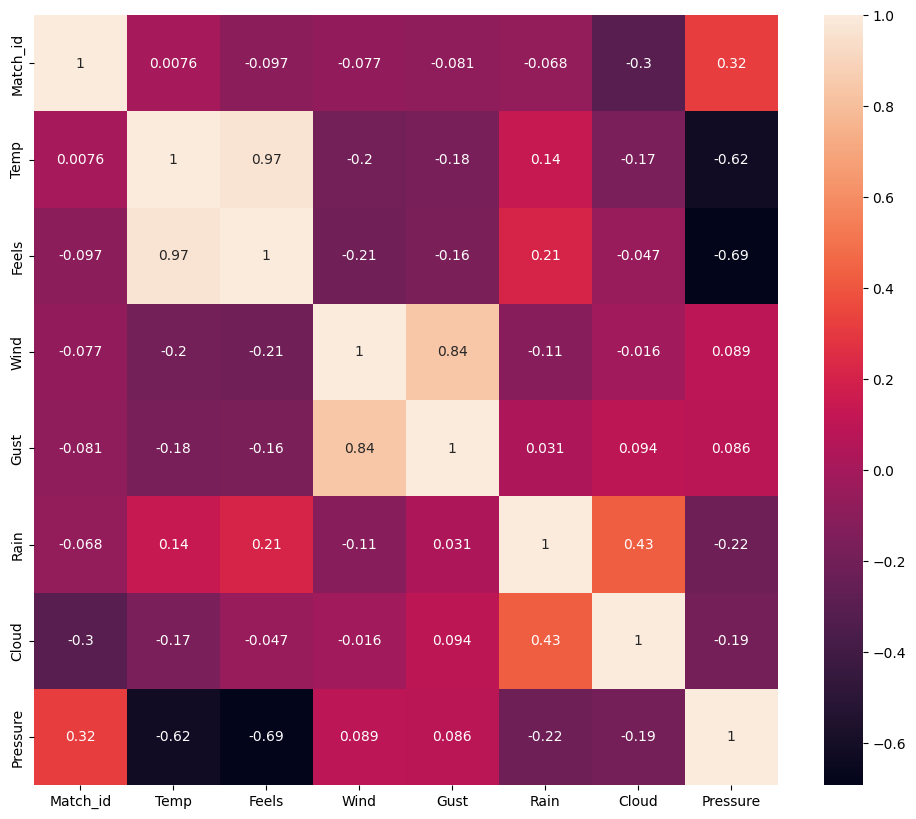

In [18]:
plt.figure(figsize=(12,10))
corr=batting_weather_dataset.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [19]:
bowling_weather_dataset_updated=bowling_weather_dataset.drop('Feels',axis=1)
bowling_weather_dataset_updated=bowling_weather_dataset_updated.drop('Gust',axis=1)
bowling_weather_dataset_updated

,Date,Match_id,URL_Text,Bowling_Session,Venue,Temp,Wind,Rain,Cloud,Pressure
0,19-Mar-15,656485,ODI # 3641,14.30-18.00,Melbourne Cricket Ground,24,13,0.2,72,1017
1,17-Apr-15,858485,ODI # 3647,18.45-22.15,Shere Bangla National Stadium,31,13,0.0,46,1004
2,19-Apr-15,858487,ODI # 3648,14.30-18.00,Shere Bangla National Stadium,27,12,0.0,23,1007
3,22-Apr-15,858489,ODI # 3649,14.30-18.00,Shere Bangla National Stadium,25,13,2.4,65,1005
4,18-Jun-15,870731,ODI # 3658,19.15-22.45,Shere Bangla National Stadium,31,10,0.0,22,999
...,...,...,...,...,...,...,...,...,...,...
101,01-Mar-23,1351397,ODI # 4525,16.15-19.45,Shere Bangla National Stadium,31,14,0.0,0,1011
102,03-Mar-23,1351398,ODI # 4528,12.00-15.30,Shere Bangla National Stadium,30,11,0.0,0,1012
103,06-Mar-23,1351399,ODI # 4531,16.15-19.45,Zahur Ahmed Chowdhury Stadium,28,13,0.0,0,1010
104,18-Mar-23,1355717,ODI # 4539,15.00-18.30,Sylhet International Cricket Stadium,27,14,0.0,29,1012


Imported Fielding Weather Dataset

In [20]:
fielding_weather_dataset=pd.read_csv('/content/drive/MyDrive/Thesis Data set/Bowling Weather Dataset/Bowling weather dataset - Sheet1.csv')
fielding_weather_dataset

,Date,Match_id,URL_Text,Bowling_Session,Venue,Temp,Feels,Wind,Gust,Rain,Cloud,Pressure
0,19-Mar-15,656485,ODI # 3641,14.30-18.00,Melbourne Cricket Ground,24,23,13,30,0.2,72,1017
1,17-Apr-15,858485,ODI # 3647,18.45-22.15,Shere Bangla National Stadium,31,34,13,23,0.0,46,1004
2,19-Apr-15,858487,ODI # 3648,14.30-18.00,Shere Bangla National Stadium,27,31,12,18,0.0,23,1007
3,22-Apr-15,858489,ODI # 3649,14.30-18.00,Shere Bangla National Stadium,25,30,13,30,2.4,65,1005
4,18-Jun-15,870731,ODI # 3658,19.15-22.45,Shere Bangla National Stadium,31,37,10,14,0.0,22,999
...,...,...,...,...,...,...,...,...,...,...,...,...
101,01-Mar-23,1351397,ODI # 4525,16.15-19.45,Shere Bangla National Stadium,31,30,14,16,0.0,0,1011
102,03-Mar-23,1351398,ODI # 4528,12.00-15.30,Shere Bangla National Stadium,30,28,11,19,0.0,0,1012
103,06-Mar-23,1351399,ODI # 4531,16.15-19.45,Zahur Ahmed Chowdhury Stadium,28,31,13,15,0.0,0,1010
104,18-Mar-23,1355717,ODI # 4539,15.00-18.30,Sylhet International Cricket Stadium,27,28,14,17,0.0,29,1012


In [21]:
fielding_weather_dataset_updated=fielding_weather_dataset.drop('Feels',axis=1)
fielding_weather_dataset_updated=fielding_weather_dataset_updated.drop('Gust',axis=1)
fielding_weather_dataset_updated

,Date,Match_id,URL_Text,Bowling_Session,Venue,Temp,Wind,Rain,Cloud,Pressure
0,19-Mar-15,656485,ODI # 3641,14.30-18.00,Melbourne Cricket Ground,24,13,0.2,72,1017
1,17-Apr-15,858485,ODI # 3647,18.45-22.15,Shere Bangla National Stadium,31,13,0.0,46,1004
2,19-Apr-15,858487,ODI # 3648,14.30-18.00,Shere Bangla National Stadium,27,12,0.0,23,1007
3,22-Apr-15,858489,ODI # 3649,14.30-18.00,Shere Bangla National Stadium,25,13,2.4,65,1005
4,18-Jun-15,870731,ODI # 3658,19.15-22.45,Shere Bangla National Stadium,31,10,0.0,22,999
...,...,...,...,...,...,...,...,...,...,...
101,01-Mar-23,1351397,ODI # 4525,16.15-19.45,Shere Bangla National Stadium,31,14,0.0,0,1011
102,03-Mar-23,1351398,ODI # 4528,12.00-15.30,Shere Bangla National Stadium,30,11,0.0,0,1012
103,06-Mar-23,1351399,ODI # 4531,16.15-19.45,Zahur Ahmed Chowdhury Stadium,28,13,0.0,0,1010
104,18-Mar-23,1355717,ODI # 4539,15.00-18.30,Sylhet International Cricket Stadium,27,14,0.0,29,1012


Imported Bowling Dataset

In [22]:
bowling_dataset=pd.read_csv('/content/drive/MyDrive/Thesis Data set/Bowling List/Bowling_data.csv')
bowling_dataset

,Name,Overs,Maidens,Runs,Wickets,Econ,Dots,4s,6s,Wd,Nb,Match_Id
0,Mashrafe Mortaza,10.0,0,69,1,6.90,30,10,0,0,1,656485
1,Taskin Ahmed,10.0,0,69,3,6.90,30,9,1,1,0,656485
2,Nasir Hossain,9.0,0,35,0,3.88,28,1,1,1,0,656485
3,Mahmudullah,1.0,0,4,0,4.00,3,0,0,0,0,656485
4,Rubel Hossain,10.0,0,56,1,5.60,25,4,1,1,1,656485
...,...,...,...,...,...,...,...,...,...,...,...,...
651,Hasan Mahmud,8.1,1,32,5,3.91,35,5,0,1,0,1355719
652,Taskin Ahmed,10.0,1,26,3,2.60,45,2,0,1,0,1355719
653,Ebadot Hossain,6.0,0,29,2,4.83,24,3,0,2,0,1355719
654,Nasum Ahmed,3.0,0,11,0,3.66,13,2,0,0,0,1355719


In [23]:
bowling_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      656 non-null    object 
 1   Overs     656 non-null    float64
 2   Maidens   656 non-null    int64  
 3   Runs      656 non-null    int64  
 4   Wickets   656 non-null    int64  
 5   Econ      656 non-null    float64
 6   Dots      656 non-null    int64  
 7   4s        656 non-null    int64  
 8   6s        656 non-null    int64  
 9   Wd        656 non-null    int64  
 10  Nb        656 non-null    int64  
 11  Match_Id  656 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 61.6+ KB


In [24]:
bowling_dataset.describe()

,Overs,Maidens,Runs,Wickets,Econ,Dots,4s,6s,Wd,Nb,Match_Id
count,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,6.560000e+02
mean,7.211738,0.257622,37.190549,1.164634,5.385655,22.649390,3.120427,0.690549,0.785061,0.076220,1.135395e+06
std,2.880283,0.589296,17.959547,1.233266,2.105833,10.898236,2.276829,0.913162,1.091741,0.303136,1.432476e+05
min,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.564850e+05
25%,5.150000,0.000000,24.000000,0.000000,4.000000,16.000000,1.000000,0.000000,0.000000,0.000000,1.051297e+06
50%,8.000000,0.000000,36.500000,1.000000,5.120000,24.000000,3.000000,0.000000,0.000000,0.000000,1.153249e+06
75%,10.000000,0.000000,49.000000,2.000000,6.330000,30.000000,4.000000,1.000000,1.000000,0.000000,1.244023e+06
max,10.000000,4.000000,93.000000,6.000000,24.000000,48.000000,12.000000,5.000000,6.000000,2.000000,1.355719e+06


In [25]:
bowling_dataset.corr()

<ipython-input-25-4b90b0ed7fd3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bowling_dataset.corr()


,Overs,Maidens,Runs,Wickets,Econ,Dots,4s,6s,Wd,Nb,Match_Id
Overs,1.000000,0.230011,0.735894,0.448811,-0.291676,0.864213,0.421395,0.246571,0.245941,0.063322,0.034479
Maidens,0.230011,1.000000,-0.074897,0.267163,-0.314108,0.441747,-0.050467,-0.041713,-0.027706,0.052295,0.097450
Runs,0.735894,-0.074897,1.000000,0.246591,0.290730,0.378988,0.760803,0.502019,0.341662,0.164745,0.018134
Wickets,0.448811,0.267163,0.246591,1.000000,-0.228680,0.516031,0.163655,0.084622,0.210017,0.060311,0.063877
Econ,-0.291676,-0.314108,0.290730,-0.228680,1.000000,-0.528869,0.372906,0.312509,0.084382,0.089704,-0.039392
Dots,0.864213,0.441747,0.378988,0.516031,-0.528869,1.000000,0.207577,0.114417,0.219879,0.041375,0.078124
4s,0.421395,-0.050467,0.760803,0.163655,0.372906,0.207577,1.000000,0.137644,0.297874,0.181339,-0.014167
6s,0.246571,-0.041713,0.502019,0.084622,0.312509,0.114417,0.137644,1.000000,0.107761,0.035698,0.127700
Wd,0.245941,-0.027706,0.341662,0.210017,0.084382,0.219879,0.297874,0.107761,1.000000,0.100323,0.094935
Nb,0.063322,0.052295,0.164745,0.060311,0.089704,0.041375,0.181339,0.035698,0.100323,1.000000,0.016937


<ipython-input-26-e670c7271eed>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=bowling_dataset.corr()


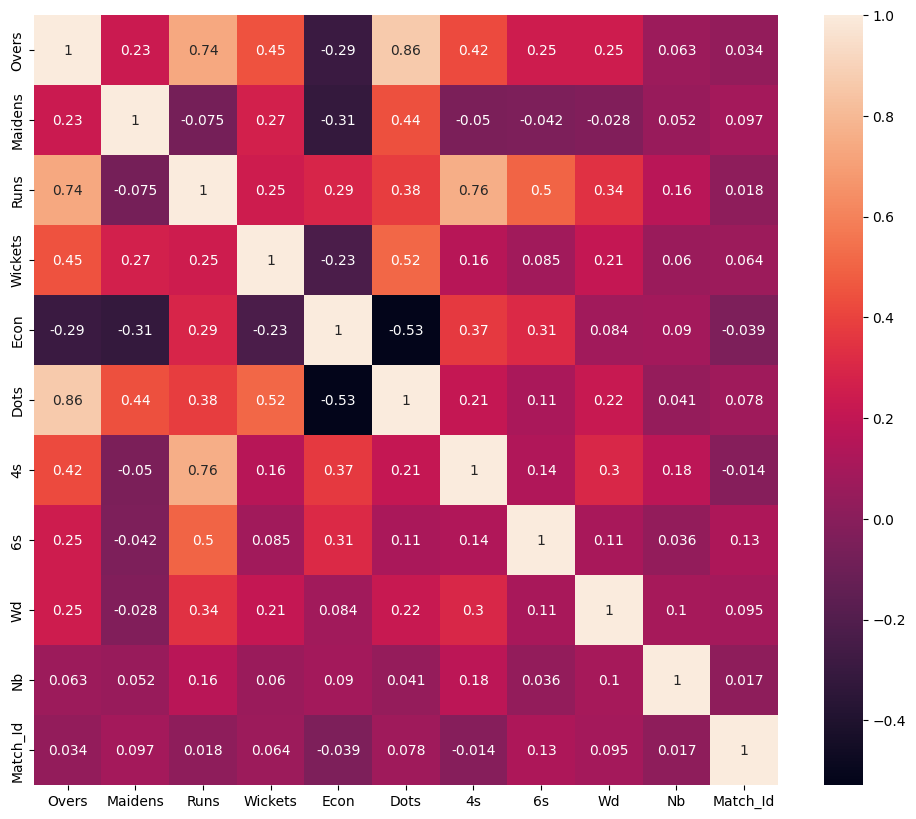

In [26]:
plt.figure(figsize=(12,10))
corr=bowling_dataset.corr()
sns.heatmap(corr,annot=True)
plt.show()

Feature Scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

def minmax_scaler_string_features(data):
    # select only the string features from the dataset
    string_features = data.select_dtypes(include=['object']).columns.tolist()

    # convert string features into numerical features using one-hot encoding
    enc = OneHotEncoder()
    enc.fit(data[string_features])
    data_encoded = enc.transform(data[string_features]).toarray()

    # scale the numerical features using MinMaxScaler
    scaler = MinMaxScaler()
    scaler.fit(data.select_dtypes(exclude=['object']))
    data_scaled = scaler.transform(data.select_dtypes(exclude=['object']))

    # combine the scaled numerical features and one-hot encoded string features into a single dataset
    data_final = pd.concat([pd.DataFrame(data_scaled), pd.DataFrame(data_encoded)], axis=1)

    return data_final


In [28]:
batting_dataset_minmax=minmax_scaler_string_features(batting_data_updated)
batting_dataset_minmax

,0,1,2,3,4,5,0,1,2,3,...,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106
0,0.142045,0.15625,0.20,0.000,0.090909,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.028409,0.08750,0.00,0.000,0.181818,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.164773,0.26875,0.15,0.125,0.272727,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.119318,0.19375,0.10,0.000,0.363636,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.056818,0.21250,0.00,0.000,0.454545,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,0.062500,0.04375,0.00,0.125,0.727273,0.999997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
921,0.062500,0.04375,0.10,0.000,0.818182,0.999997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
922,0.005682,0.01250,0.00,0.000,0.909091,0.999997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
923,0.232955,0.25625,0.25,0.250,0.090909,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
bowling_dataset_minmax=minmax_scaler_string_features(bowling_dataset)
bowling_dataset_minmax

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.000000,0.00,0.741935,0.166667,0.287500,0.625000,0.833333,0.0,0.000000,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.00,0.741935,0.500000,0.287500,0.625000,0.750000,0.2,0.166667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.898990,0.00,0.376344,0.000000,0.161667,0.583333,0.083333,0.2,0.166667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.090909,0.00,0.043011,0.000000,0.166667,0.062500,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.00,0.602151,0.166667,0.233333,0.520833,0.333333,0.2,0.166667,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,0.808081,0.25,0.344086,0.833333,0.162917,0.729167,0.416667,0.0,0.166667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
652,1.000000,0.25,0.279570,0.500000,0.108333,0.937500,0.166667,0.0,0.166667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
653,0.595960,0.00,0.311828,0.333333,0.201250,0.500000,0.250000,0.0,0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
654,0.292929,0.00,0.118280,0.000000,0.152500,0.270833,0.166667,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
batting_weather_dataset_minmax=minmax_scaler_string_features(batting_weather_dataset_updated)
batting_weather_dataset_minmax

,0,1,2,3,4,5,0,1,2,3,...,260,261,262,263,264,265,266,267,268,269
0,0.000000,0.36,0.37500,0.076923,0.73,0.525,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.288888,0.88,0.34375,0.000000,0.46,0.225,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.288890,0.68,0.34375,0.000000,0.15,0.300,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.288893,0.60,0.34375,1.000000,0.62,0.200,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.306401,0.80,0.21875,0.000000,0.21,0.050,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.993819,0.96,0.40625,0.000000,0.00,0.400,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,0.993820,0.80,0.25000,0.000000,0.00,0.400,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,0.993822,0.76,0.37500,0.000000,0.00,0.375,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
104,0.999997,0.56,0.40625,0.000000,0.27,0.425,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
bowling_weather_dataset_minmax=minmax_scaler_string_features(bowling_weather_dataset_updated)
bowling_weather_dataset_minmax

,0,1,2,3,4,5,0,1,2,3,...,260,261,262,263,264,265,266,267,268,269
0,0.000000,0.523810,0.310345,0.083333,0.734694,0.540541,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.288888,0.857143,0.310345,0.000000,0.469388,0.189189,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.288890,0.666667,0.275862,0.000000,0.234694,0.270270,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.288893,0.571429,0.310345,1.000000,0.663265,0.216216,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.306401,0.857143,0.206897,0.000000,0.224490,0.054054,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.993819,0.857143,0.344828,0.000000,0.000000,0.378378,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,0.993820,0.809524,0.241379,0.000000,0.000000,0.405405,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,0.993822,0.714286,0.310345,0.000000,0.000000,0.351351,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
104,0.999997,0.666667,0.344828,0.000000,0.295918,0.405405,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
fielding_weather_dataset_minmax=minmax_scaler_string_features(fielding_weather_dataset_updated)
fielding_weather_dataset_minmax

,0,1,2,3,4,5,0,1,2,3,...,260,261,262,263,264,265,266,267,268,269
0,0.000000,0.523810,0.310345,0.083333,0.734694,0.540541,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.288888,0.857143,0.310345,0.000000,0.469388,0.189189,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.288890,0.666667,0.275862,0.000000,0.234694,0.270270,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.288893,0.571429,0.310345,1.000000,0.663265,0.216216,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.306401,0.857143,0.206897,0.000000,0.224490,0.054054,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.993819,0.857143,0.344828,0.000000,0.000000,0.378378,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,0.993820,0.809524,0.241379,0.000000,0.000000,0.405405,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,0.993822,0.714286,0.310345,0.000000,0.000000,0.351351,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
104,0.999997,0.666667,0.344828,0.000000,0.295918,0.405405,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Individual Player performance

In [33]:
def get_batting_consistency(data, name):
    # Load the dataset into a pandas DataFrame
    df = pd.DataFrame(data)
    
    # Filter the DataFrame to only include rows for the specified player name
    player_df = df.loc[df['Name'] == name]
    
    # Create a list of dictionaries representing the stats for each occurrence of the name
    stats_list = []
    total_runs = 0
    total_balls=0
    innings=0
    not_out=0
    average=0
    centuries=0
    fiftees=0
    zeros=0
    for i in range(len(player_df)):


        innings=innings+1
        desc= player_df.iloc[i]['Description']
        if (desc=='not out'):
          not_out=not_out+1
        balls= player_df.iloc[i]['Balls']
        runs= player_df.iloc[i]['Runs']
        if (runs>=100):
          centuries=centuries+1
        if (runs>=50 and runs<100):
          fiftees=fiftees+1
        if (runs==0):
          zeros=zeros+1
        
        stats = {
            'description': player_df.iloc[i]['Description'],
            'runs': player_df.iloc[i]['Runs'],
            'balls': player_df.iloc[i]['Balls'],
            'fours': player_df.iloc[i]['Fours'],
            'sixes': player_df.iloc[i]['Sixes']
        }
        total_runs += player_df.iloc[i]['Runs']
        total_balls+= player_df.iloc[i]['Balls']
        
        stats_list.append(stats)
    try:
      average=total_runs/(innings-not_out)
    except:
      average=0

    strike_rate=(total_runs/total_balls)*100

    Consistency = round(0.4262*average + 0.2566*innings + 0.1510*strike_rate + 0.0787*centuries + 0.0556*fiftees - 0.0328*zeros,2)
    
    return Consistency


In [34]:
batting_consistency = get_batting_consistency(batting_data_updated, 'Afif Hossain')
batting_form=batting_consistency
batting_opposition=batting_consistency

print(batting_consistency)
print(batting_form)


32.64
32.64


In [35]:
def get_batting_venue(data, name):
    # Load the dataset into a pandas DataFrame
    df = pd.DataFrame(data)
    
    # Filter the DataFrame to only include rows for the specified player name
    player_df = df.loc[df['Name'] == name]
    
    # Create a list of dictionaries representing the stats for each occurrence of the name
    stats_list = []
    total_runs = 0
    total_balls=0
    innings=0
    not_out=0
    average=0
    centuries=0
    fiftees=0
    zeros=0
    hs=0
    for i in range(len(player_df)):


        innings=innings+1
        desc= player_df.iloc[i]['Description']
        if (desc=='not out'):
          not_out=not_out+1
        balls= player_df.iloc[i]['Balls']
        runs= player_df.iloc[i]['Runs']
        if (runs>hs):
          hs=runs
        if (runs>=100):
          centuries=centuries+1
        if (runs>=50 and runs<100):
          fiftees=fiftees+1
        if (runs==0):
          zeros=zeros+1
        
        stats = {
            'description': player_df.iloc[i]['Description'],
            'runs': player_df.iloc[i]['Runs'],
            'balls': player_df.iloc[i]['Balls'],
            'fours': player_df.iloc[i]['Fours'],
            'sixes': player_df.iloc[i]['Sixes']
        }
        total_runs += player_df.iloc[i]['Runs']
        total_balls+= player_df.iloc[i]['Balls']

        
        stats_list.append(stats)
    average=total_runs/(innings-not_out)
    strike_rate=(total_runs/total_balls)*100
  

    Consistency = round(0.4262*average + 0.2566*innings + 0.1510*strike_rate + 0.0787*centuries + 0.0556*fiftees -0.0328*hs ,2)
    
    return Consistency


In [36]:
batting_venue=get_batting_venue(batting_data_updated,'Tamim Iqbal')
print(batting_venue)

47.4


In [37]:
def get_bolwer_consistency(data, name):
    # Load the dataset into a pandas DataFrame
    df = pd.DataFrame(data)
    
    # Filter the DataFrame to only include rows for the specified player name
    player_df = df.loc[df['Name'] == name]
    
    # Create a list of dictionaries representing the stats for each occurrence of the name
    stats_list = []
    total_overs = 0
    total_runs=0
    total_wickets=0
    innings=0
    fifer=0
    for i in range(len(player_df)):


        wickets=player_df.iloc[i]['Wickets']
        if(wickets==5):
          fifer=fifer+1

        innings=innings+1
        total_overs += player_df.iloc[i]['Overs']
        total_wickets += player_df.iloc[i]['Wickets']
        total_runs += player_df.iloc[i]['Runs']

        
        stats_list.append(stats)
    strike_rate=round((total_overs*6/total_wickets),2)
    average= round(total_runs/total_wickets,2)

    Consistency = round(0.4174*total_overs + 0.2634*innings + 0.1602*strike_rate + 0.0975*average + 0.0615*fifer,2)
    
    return Consistency


In [38]:


bowling_consistency= get_bolwer_consistency(bowling_dataset, 'Mehidy Hasan Miraz')

print(bowling_consistency)


267.71


In [39]:
def get_bowler_form(data, name):
    # Load the dataset into a pandas DataFrame
    df = pd.DataFrame(data)
    
    # Filter the DataFrame to only include rows for the specified player name
    player_df = df.loc[df['Name'] == name]
    
    # Create a list of dictionaries representing the stats for each occurrence of the name
    stats_list = []
    total_overs = 0
    total_runs=0
    total_wickets=0
    innings=0
    fifer=0
    for i in range(len(player_df)):


        wickets=player_df.iloc[i]['Wickets']
        if(wickets==5):
          fifer=fifer+1

        innings=innings+1
        total_overs += player_df.iloc[i]['Overs']
        total_wickets += player_df.iloc[i]['Wickets']
        total_runs += player_df.iloc[i]['Runs']

        
        stats_list.append(stats)
    strike_rate=round((total_overs*6/total_wickets),2)
    average= round(total_runs/total_wickets,2)

    form = round(0.3269*total_overs + 0.2846*innings + 0.1877*strike_rate + 0.1210*average + 0.0798*fifer,2)
    
    return form 


In [40]:
bowling_form=get_bowler_form(bowling_dataset, 'Mehidy Hasan Miraz')
print(bowling_form)

219.03


In [41]:
def get_bowling_opposition(data, name):
    # Load the dataset into a pandas DataFrame
    df = pd.DataFrame(data)
    
    # Filter the DataFrame to only include rows for the specified player name
    player_df = df.loc[df['Name'] == name]
    
    # Create a list of dictionaries representing the stats for each occurrence of the name
    stats_list = []
    total_overs = 0
    total_runs=0
    total_wickets=0
    innings=0
    fifer=0
    for i in range(len(player_df)):


        wickets=player_df.iloc[i]['Wickets']
        if(wickets==5):
          fifer=fifer+1

        innings=innings+1
        total_overs += player_df.iloc[i]['Overs']
        total_wickets += player_df.iloc[i]['Wickets']
        total_runs += player_df.iloc[i]['Runs']

        
        stats_list.append(stats)
    strike_rate=round((total_overs*6/total_wickets),2)
    average= round(total_runs/total_wickets,2)

    opposition= round(0.3177*total_overs + 0.3177*innings + 0.1933*strike_rate + 0.1465*average + 0.0943*fifer,2)
    
    return opposition 


In [42]:
bowling_opposition=get_bowling_opposition(bowling_dataset, 'Mehidy Hasan Miraz')
print(bowling_opposition)

217.05


In [43]:
def get_bowling_venue(data, name):
    # Load the dataset into a pandas DataFrame
    df = pd.DataFrame(data)
    
    # Filter the DataFrame to only include rows for the specified player name
    player_df = df.loc[df['Name'] == name]
    
    # Create a list of dictionaries representing the stats for each occurrence of the name
    stats_list = []
    total_overs = 0
    total_runs=0
    total_wickets=0
    innings=0
    fifer=0
    for i in range(len(player_df)):


        wickets=player_df.iloc[i]['Wickets']
        if(wickets==5):
          fifer=fifer+1

        innings=innings+1
        total_overs += player_df.iloc[i]['Overs']
        total_wickets += player_df.iloc[i]['Wickets']
        total_runs += player_df.iloc[i]['Runs']

        
        stats_list.append(stats)
    strike_rate=round((total_overs*6/total_wickets),2)
    average= round(total_runs/total_wickets,2)

    venue= round(0.3018*total_overs + 0.2783*innings + 0.1836*strike_rate + 0.1391*average + 0.0972*fifer,2)
    
    return venue


In [44]:
bowling_venue=get_bowling_venue(bowling_dataset, 'Mehidy Hasan Miraz')
print(bowling_venue)

204.59


Run random forest model

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [46]:
batting_df=batting_data_updated
batting_df

,Name,Description,Runs,Balls,Fours,Sixes,Strike_Rate,Batting_position,Match_id
0,Tamim Iqbal,c â Dhoni b Yadav,25,25,4,0,100,1,656485
1,Imrul Kayes,run out (Jadeja/Yadav),5,14,0,0,35.71,2,656485
2,Soumya Sarkar,c Dhoni b Mohammed Shami,29,43,3,1,67.44,3,656485
3,Mahmudullah,c Dhawan b Mohammed Shami,21,31,2,0,67.74,4,656485
4,Shakib Al Hasan,c Mohammed Shami b Jadeja,10,34,0,0,29.41,5,656485
...,...,...,...,...,...,...,...,...,...
920,Taskin Ahmed,c Adair b Hume,11,7,0,1,157.14,8,1355717
921,Nasum Ahmed,not out,11,7,2,0,157.14,9,1355717
922,Mustafizur Rahman,not out,1,2,0,0,50,10,1355717
923,Tamim Iqbal (c),not out,41,41,5,2,100,1,1355719


In [47]:
batting_weather_df=batting_weather_dataset_updated
batting_weather_df

,Date,Match_id,URL_Text,Batting_Session,Venue,Temp,Wind,Rain,Cloud,Pressure
0,19-Mar-15,656485,ODI # 3641,18.45-22.15,Melbourne Cricket Ground,21,14,0.2,73,1017
1,17-Apr-15,858485,ODI # 3647,14.30-18.00,Shere Bangla National Stadium,34,13,0.0,46,1005
2,19-Apr-15,858487,ODI # 3648,18.45-22.15,Shere Bangla National Stadium,29,13,0.0,15,1008
3,22-Apr-15,858489,ODI # 3649,18.45-22.15,Shere Bangla National Stadium,27,13,2.6,62,1004
4,18-Jun-15,870731,ODI # 3658,15.00-18.30,Shere Bangla National Stadium,32,9,0.0,21,998
...,...,...,...,...,...,...,...,...,...,...
101,01-Mar-23,1351397,ODI # 4525,12.00-15.30,Shere Bangla National Stadium,36,15,0.0,0,1012
102,03-Mar-23,1351398,ODI # 4528,16.15-19.45,Shere Bangla National Stadium,32,10,0.0,0,1012
103,06-Mar-23,1351399,ODI # 4531,12.00-15.30,Zahur Ahmed Chowdhury Stadium,31,14,0.0,0,1011
104,18-Mar-23,1355717,ODI # 4539,10.45-14.15,Sylhet International Cricket Stadium,26,15,0.0,27,1013


In [48]:
batting_merged_df = pd.merge(batting_df, batting_weather_df, on=['Match_id'])
batting_merged_df.shape

(925, 18)

In [136]:
# Calculate the batting consistency and batting form(
names=batting_df['Name']
# print(names)
batting_consistency_df = pd.DataFrame(columns=['Name', 'Batting Consistency','Batting Form'])
for name in names:
  # print(name)

  batting_consistency = get_batting_consistency(batting_df,name)
  batting_form= get_batting_consistency(batting_df, name)
  # print(batting_consistency)
  batting_consistency_df= pd.concat([batting_consistency_df, pd.DataFrame({'Name': [name], 'Batting Consistency': [batting_consistency],'Batting Form':[batting_form]})], ignore_index=True)
  
batting_merged_df= pd.merge(batting_consistency_df , batting_merged_df, on='Name')
  # batting_consistency_df['batting_consistency'] = get_batting_consistency(batting_df, name)
  # batting_consistency_df = batting_consistency_df[['batting_consistency']]
  
# batting_consistency_df
batting_merged_df

<ipython-input-33-a0dc6286c8c5>:46: RuntimeWarning: divide by zero encountered in long_scalars
  average=total_runs/(innings-not_out)
<ipython-input-33-a0dc6286c8c5>:46: RuntimeWarning: divide by zero encountered in long_scalars
  average=total_runs/(innings-not_out)
<ipython-input-33-a0dc6286c8c5>:46: RuntimeWarning: divide by zero encountered in long_scalars
  average=total_runs/(innings-not_out)
<ipython-input-33-a0dc6286c8c5>:46: RuntimeWarning: divide by zero encountered in long_scalars
  average=total_runs/(innings-not_out)
<ipython-input-33-a0dc6286c8c5>:46: RuntimeWarning: divide by zero encountered in long_scalars
  average=total_runs/(innings-not_out)


,Name,Batting Consistency_x,Batting Form_x,Batting Consistency_y,Batting Form_y,Description,Runs,Balls,Fours,Sixes,...,Match_id,Date,URL_Text,Batting_Session,Venue,Temp,Wind,Rain,Cloud,Pressure
0,Tamim Iqbal,52.49,52.49,52.49,52.49,c â Dhoni b Yadav,25,25,4,0,...,656485,19-Mar-15,ODI # 3641,18.45-22.15,Melbourne Cricket Ground,21,14,0.2,73,1017
1,Tamim Iqbal,52.49,52.49,52.49,52.49,c Mohammad Rizwan b Wahab Riaz,132,135,15,3,...,858485,17-Apr-15,ODI # 3647,14.30-18.00,Shere Bangla National Stadium,34,13,0.0,46,1005
2,Tamim Iqbal,52.49,52.49,52.49,52.49,not out,116,116,17,1,...,858487,19-Apr-15,ODI # 3648,18.45-22.15,Shere Bangla National Stadium,29,13,0.0,15,1008
3,Tamim Iqbal,52.49,52.49,52.49,52.49,lbw b Junaid Khan,64,76,8,1,...,858489,22-Apr-15,ODI # 3649,18.45-22.15,Shere Bangla National Stadium,27,13,2.6,62,1004
4,Tamim Iqbal,52.49,52.49,52.49,52.49,c RG Sharma b Ashwin,60,62,7,1,...,870731,18-Jun-15,ODI # 3658,15.00-18.30,Shere Bangla National Stadium,32,9,0.0,21,998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770202,Nasum Ahmed,inf,inf,inf,inf,not out,18,11,2,1,...,1340846,07-Dec-22,ODI # 4496,13.00-16.30,Shere Bangla National Stadium,28,12,0.0,0,1009
2770203,Nasum Ahmed,inf,inf,inf,inf,not out,11,7,2,0,...,1355717,18-Mar-23,ODI # 4539,10.45-14.15,Sylhet International Cricket Stadium,26,15,0.0,27,1013
2770204,Nasum Ahmed,inf,inf,inf,inf,not out,18,11,2,1,...,1340846,07-Dec-22,ODI # 4496,13.00-16.30,Shere Bangla National Stadium,28,12,0.0,0,1009
2770205,Nasum Ahmed,inf,inf,inf,inf,not out,11,7,2,0,...,1355717,18-Mar-23,ODI # 4539,10.45-14.15,Sylhet International Cricket Stadium,26,15,0.0,27,1013


Match List imported

In [52]:
match_list_df=pd.read_csv('/content/drive/MyDrive/Thesis Data set/Match list data/match_lists_data - match_lists_data (1).csv')
match_list_df

,Score,Wickets,Overs,RPO,Target,Innings,Result,Opposition,Ground,Date,Match_id,Url text,Batting_Session,Bowling_Session,Venue,Toss_Win
0,193,10,45.0,4.28,303.0,2,lost,India,Melbourne,19-Mar-2015,656485,ODI # 3641,18.45-22.15,14.30-18.00,MelbourneCricketGround,False
1,329,6,50.0,6.58,NaN,1,won,Pakistan,Mirpur,17-Apr-2015,858485,ODI # 3647,14.30-18.00,18.45-22.15,ShereBanglaNationalStadium,True
2,240,3,38.1,6.28,240.0,2,won,Pakistan,Mirpur,19-Apr-2015,858487,ODI # 3648,18.45-22.15,14.30-18.00,ShereBanglaNationalStadium,False
3,251,2,39.3,6.35,251.0,2,won,Pakistan,Mirpur,22-Apr-2015,858489,ODI # 3649,18.45-22.15,14.30-18.00,ShereBanglaNationalStadium,False
4,307,10,49.4,6.18,NaN,1,won,India,Mirpur,18-Jun-2015,870731,ODI # 3658,15.00-18.30,19.15-22.45,ShereBanglaNationalStadium,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,209,10,47.2,4.41,NaN,1,lost,England,Mirpur,1-Mar-2023,1351397,ODI # 4525,12.00-15.30,16.15-19.45,ShereBanglaNationalStadium,True
102,194,10,44.4,4.34,327.0,2,lost,England,Mirpur,3-Mar-2023,1351398,ODI # 4528,16.15-19.45,12.00-15.30,ShereBanglaNationalStadium,True
103,246,10,48.5,5.03,NaN,1,won,England,Chattogram,6-Mar-2023,1351399,ODI # 4531,12.00-15.30,16.15-19.45,ZahurAhmedChowdhuryStadium,True
104,338,8,50.0,6.76,NaN,1,won,Ireland,Sylhet,18-Mar-2023,1355717,ODI # 4539,10.45-14.15,15.00-18.30,SylhetInternationalCricketStadium,False


In [ ]:
batting_match_df = pd.merge(batting_merged_df, match_list_df, on='Match_id')

In [90]:
# One-hot encode categorical variables
batting_match_df = pd.get_dummies(batting_match_df, columns=['Batting_position','Innings', 'Batting_Session_y', 'Toss_Win', 'Venue_y', 'Opposition'])

# Drop unnecessary columns
cols_to_drop = ['Name', 'Description', 'Match_id', 'Url text']
batting_match_df.drop(columns=cols_to_drop, inplace=True)

batting_match_df

,Batting Consistency,Batting Form,Runs,Balls,Fours,Sixes,Strike_Rate,Date_x,URL_Text,Batting_Session_x,...,Opposition_Australia,Opposition_England,Opposition_India,Opposition_Ireland,Opposition_New Zealand,Opposition_Pakistan,Opposition_South Africa,Opposition_Sri Lanka,Opposition_West Indies,Opposition_Zimbabwe
0,52.49,52.49,25,25,4,0,100,19-Mar-15,ODI # 3641,18.45-22.15,...,0,0,1,0,0,0,0,0,0,0
1,52.49,52.49,25,25,4,0,100,19-Mar-15,ODI # 3641,18.45-22.15,...,0,0,1,0,0,0,0,0,0,0
2,52.49,52.49,25,25,4,0,100,19-Mar-15,ODI # 3641,18.45-22.15,...,0,0,1,0,0,0,0,0,0,0
3,52.49,52.49,25,25,4,0,100,19-Mar-15,ODI # 3641,18.45-22.15,...,0,0,1,0,0,0,0,0,0,0
4,52.49,52.49,25,25,4,0,100,19-Mar-15,ODI # 3641,18.45-22.15,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44242,35.08,35.08,41,41,5,2,100,23-Mar-23,ODI # 4547,15.00-18.30,...,0,0,0,1,0,0,0,0,0,0
44243,35.08,35.08,41,41,5,2,100,23-Mar-23,ODI # 4547,15.00-18.30,...,0,0,0,1,0,0,0,0,0,0
44244,35.08,35.08,41,41,5,2,100,23-Mar-23,ODI # 4547,15.00-18.30,...,0,0,0,1,0,0,0,0,0,0
44245,35.08,35.08,41,41,5,2,100,23-Mar-23,ODI # 4547,15.00-18.30,...,0,0,0,1,0,0,0,0,0,0


In [106]:
features = ['Batting Consistency', 'Batting Form', 'Temp', 'Wind', 'Rain', 'Cloud', 'Pressure']

In [133]:
X = batting_match_df[features]
y = batting_match_df[['Runs', 'Balls', 'Fours', 'Sixes']]
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1221)
print(y_test.shape)


(44247, 7)
(44247, 4)


In [135]:
X_train= np.nan_to_num(X_train, nan=0.0, posinf=1e15, neginf=-1e15)
y_train= np.nan_to_num(X_train, nan=0.0, posinf=1e15, neginf=-1e15)
X_test= np.nan_to_num(X_test, nan=0.0, posinf=1e15, neginf=-1e15)
y_test= np.nan_to_num(y_test, nan=0.0, posinf=1e15, neginf=-1e15)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(30972, 7)
(30972, 7)
(13275, 7)
(13275, 4)


In [124]:


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model's performance using the testing data
y_pred = rf_model.predict(X_test)

if y_pred.shape != y_test.shape:
    y_pred = np.reshape(y_pred, y_test.shape)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Mean squared error:', mse)
print('Mean absolute error:', mae)

ValueError: ignored